# Incorporating lightcurves

The goal of this notebook is to demonstrate the use of lightcurves within `sorcha`.

This will be done in two different ways:
- We will use the community tools part of the `sorcha-addons`(https://github.com/dirac-institute/sorcha-addons) package
- We will implement a custom lightcurve, and use it inside the code

The idea is that the user can, in principle, implement their own lightcurves, and incorporate them in their simulation. The goal of `sorcha-addons` is for both the development team, as well as for the community, to share their implementations of custom lightcurve models. 

For more information on creating custom lightcurve models for Sorcha, see (https://sorcha.readthedocs.io/en/latest/postprocessing.html#lightcurve-template-class) 

In [1]:
import pandas as pd
import numpy as np
import astropy.units as u
from astroquery.jplhorizons import Horizons
from sorcha_addons.lightcurve.sinusoidal.sinusoidal_lightcurve import SinusoidalLightCurve
from sorcha.modules.PPCalculateApparentMagnitudeInFilter import PPCalculateApparentMagnitudeInFilter
import matplotlib.pyplot as plt

This notebook will not use a realistic set of observations (as in the `demo_ApparentMagnitudeValidation` notebook), but rather create a toy scenario with a simple to understand and interpret set of results. The general structure of the notebook will be the same.

We will create a dataframe for observations in a similar structure as in the `demo_ApparentMagnitudeValidation` notebook:

In [2]:
observations_df = pd.DataFrame(
    {
        "fieldMJD_TAI": np.linspace(
            0, 100, 1001
        ),  # time of observation - note these values are bogus, we only care about the Delta t for this demo
        "H_filter": 10 * np.ones(1001),
        "GS": 0.15 * np.ones(1001),
        "G1": 0.62 * np.ones(1001),
        "G2": 0.14 * np.ones(1001),
        "G12": 0.68 * np.ones(1001),
        "S": 0.04 * np.ones(1001),
        "Range_LTC_km": 1.495978707e8 * np.ones(1001),  # 1 au
        "Obj_Sun_LTC_km": 1.495978707e8 * np.ones(1001),  # 1 au
        "phase_deg": np.linspace(0, 10, 1001),
    }
)  # some phase angle variation so we can see the phase curve on top of the lightcurve

In [3]:
observations_df

,fieldMJD_TAI,H_filter,GS,G1,G2,G12,S,Range_LTC_km,Obj_Sun_LTC_km,phase_deg
0,0.0,10.0,0.15,0.62,0.14,0.68,0.04,149597870.7,149597870.7,0.00
1,0.1,10.0,0.15,0.62,0.14,0.68,0.04,149597870.7,149597870.7,0.01
2,0.2,10.0,0.15,0.62,0.14,0.68,0.04,149597870.7,149597870.7,0.02
3,0.3,10.0,0.15,0.62,0.14,0.68,0.04,149597870.7,149597870.7,0.03
4,0.4,10.0,0.15,0.62,0.14,0.68,0.04,149597870.7,149597870.7,0.04
...,...,...,...,...,...,...,...,...,...,...
996,99.6,10.0,0.15,0.62,0.14,0.68,0.04,149597870.7,149597870.7,9.96
997,99.7,10.0,0.15,0.62,0.14,0.68,0.04,149597870.7,149597870.7,9.97
998,99.8,10.0,0.15,0.62,0.14,0.68,0.04,149597870.7,149597870.7,9.98
999,99.9,10.0,0.15,0.62,0.14,0.68,0.04,149597870.7,149597870.7,9.99


Now we calculate the magnitude using the various models in PPCalculateApparentMagnitudeInFilter.

In [4]:
observations_df = PPCalculateApparentMagnitudeInFilter(observations_df.copy(), "HG", "r", "HG_mag")
observations_df = PPCalculateApparentMagnitudeInFilter(observations_df.copy(), "HG12", "r", "HG12_mag")
observations_df = PPCalculateApparentMagnitudeInFilter(observations_df.copy(), "HG1G2", "r", "HG1G2_mag")
observations_df = PPCalculateApparentMagnitudeInFilter(observations_df.copy(), "linear", "r", "linear_mag")
observations_df = PPCalculateApparentMagnitudeInFilter(observations_df.copy(), "none", "r", "Simple_mag")

In [5]:
observations_df

,fieldMJD_TAI,H_filter,GS,G1,G2,G12,S,Range_LTC_km,Obj_Sun_LTC_km,phase_deg,HG_mag,HG12_mag,HG1G2_mag,linear_mag,Simple_mag
0,0.0,10.0,0.15,0.62,0.14,0.68,0.04,149597870.7,149597870.7,0.00,10.000000,10.000000,10.000000,10.0000,10.0
1,0.1,10.0,0.15,0.62,0.14,0.68,0.04,149597870.7,149597870.7,0.01,10.001390,10.000361,10.000366,10.0004,10.0
2,0.2,10.0,0.15,0.62,0.14,0.68,0.04,149597870.7,149597870.7,0.02,10.002776,10.000884,10.000884,10.0008,10.0
3,0.3,10.0,0.15,0.62,0.14,0.68,0.04,149597870.7,149597870.7,0.03,10.004158,10.001562,10.001549,10.0012,10.0
4,0.4,10.0,0.15,0.62,0.14,0.68,0.04,149597870.7,149597870.7,0.04,10.005537,10.002388,10.002352,10.0016,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,99.6,10.0,0.15,0.62,0.14,0.68,0.04,149597870.7,149597870.7,9.96,10.656917,10.628635,10.624403,10.3984,10.0
997,99.7,10.0,0.15,0.62,0.14,0.68,0.04,149597870.7,149597870.7,9.97,10.657299,10.629045,10.624827,10.3988,10.0
998,99.8,10.0,0.15,0.62,0.14,0.68,0.04,149597870.7,149597870.7,9.98,10.657681,10.629454,10.625251,10.3992,10.0
999,99.9,10.0,0.15,0.62,0.14,0.68,0.04,149597870.7,149597870.7,9.99,10.658064,10.629864,10.625675,10.3996,10.0


Now we can plot the magnitudes and compare them.

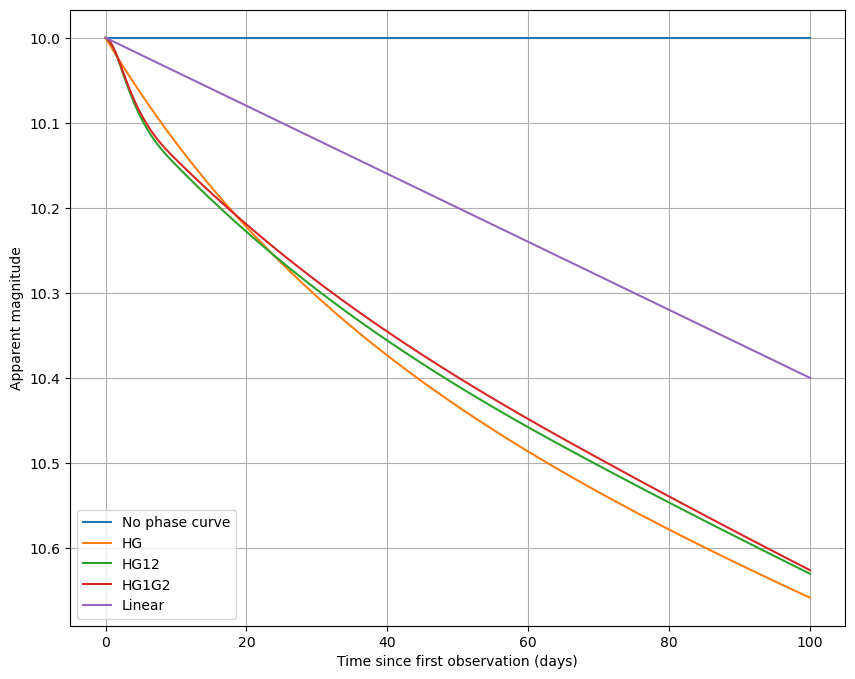

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(observations_df["fieldMJD_TAI"], observations_df["Simple_mag"], linestyle="-", label="No phase curve")
ax.plot(observations_df["fieldMJD_TAI"], observations_df["HG_mag"], label="HG")
ax.plot(observations_df["fieldMJD_TAI"], observations_df["HG12_mag"], label="HG12")
ax.plot(observations_df["fieldMJD_TAI"], observations_df["HG1G2_mag"], label="HG1G2")
ax.plot(observations_df["fieldMJD_TAI"], observations_df["linear_mag"], label="Linear")

ax.legend()
ax.set_xlabel("Time since first observation (days)")
ax.set_ylabel("Apparent magnitude")
plt.gca().invert_yaxis()
plt.grid()
plt.show()

The effect of the lightcurve is to add an extra term to the apparent magnitude, that, in principle, can be a function of the characteristics of the observations, such as time of observation, phase angle or topocentric and heliocentric distances. The entire `observational_df` dataframe is exposed to the lightcurve, so any dependencies can be added. 

Let's use the basic sinusoidal lightcurve from `sorcha_addons`. We need the following columns in our dataframe:

* ``LCA`` - lightcurve amplitude [magnitudes].
* ``Period`` - period of the sinusoidal oscillation [days]. Should be a positive value.
* ``Time0`` - phase for the light curve [days].

Let's create a lightcurve with a period of 20 days, phased so that the first observation is at zero variation, and with 0.5 mag peak-to-peak amplitude.

In [7]:
from sorcha.lightcurves.lightcurve_registration import LC_METHODS, update_lc_subclasses

# LC_METHODS is the dictionary that contains all lightcurve implementations
# update_lc_subclasses adds newly defined classes to this dictionary
# this is run by default inside sorcha - we are just showing it here for completeness
update_lc_subclasses()
print(LC_METHODS)

{'identity': <class 'sorcha.lightcurves.identity_lightcurve.IdentityLightCurve'>, 'sinusoidal': <class 'sorcha_addons.lightcurve.sinusoidal.sinusoidal_lightcurve.SinusoidalLightCurve'>}


In [8]:
observations_df["LCA"] = 0.25  # note peak-to-peak is 2LCA!
observations_df["Period"] = 20.0
observations_df["Time0"] = 0.0

In [9]:
observations_df = PPCalculateApparentMagnitudeInFilter(
    observations_df.copy(), "none", "r", "LCA_mag", "sinusoidal"
)
observations_df = PPCalculateApparentMagnitudeInFilter(
    observations_df.copy(), "HG", "r", "LCA_HG_mag", "sinusoidal"
)
observations_df = PPCalculateApparentMagnitudeInFilter(
    observations_df.copy(), "HG12", "r", "LCA_HG12_mag", "sinusoidal"
)
observations_df = PPCalculateApparentMagnitudeInFilter(
    observations_df.copy(), "HG1G2", "r", "LCA_HG1G2_mag", "sinusoidal"
)
observations_df = PPCalculateApparentMagnitudeInFilter(
    observations_df.copy(), "linear", "r", "LCA_linear_mag", "sinusoidal"
)

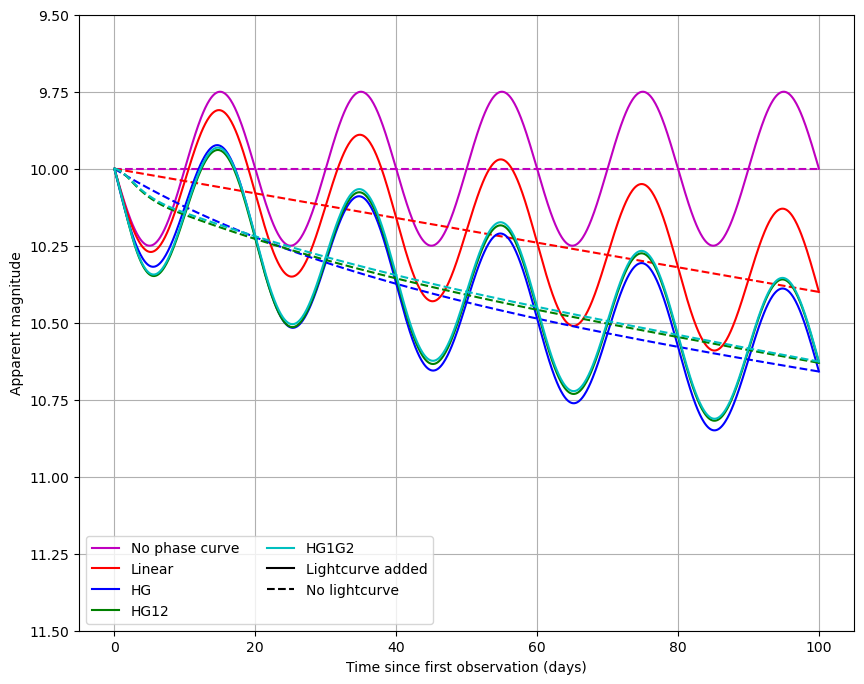

In [10]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["Simple_mag"],
    linestyle="--",
    label="__none__",
    color="m",
)
ax.plot(
    observations_df["fieldMJD_TAI"], observations_df["LCA_mag"], linestyle="-", label="__none__", color="m"
)

ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["linear_mag"],
    linestyle="--",
    label="__none__",
    color="r",
)
ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["LCA_linear_mag"],
    linestyle="-",
    label="__none__",
    color="r",
)


ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["HG_mag"],
    linestyle="--",
    label="__none__",
    color="b",
)
ax.plot(
    observations_df["fieldMJD_TAI"], observations_df["LCA_HG_mag"], linestyle="-", label="__none__", color="b"
)

ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["HG12_mag"],
    linestyle="--",
    label="__none__",
    color="g",
)
ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["LCA_HG12_mag"],
    linestyle="-",
    label="__none__",
    color="g",
)

ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["HG1G2_mag"],
    linestyle="--",
    label="__none__",
    color="c",
)
ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["LCA_HG1G2_mag"],
    linestyle="-",
    label="__none__",
    color="c",
)


custom_legend = [
    Line2D([0], [0], color="m", linestyle="-"),
    Line2D([0], [0], color="r", linestyle="-"),
    Line2D([0], [0], color="b", linestyle="-"),
    Line2D([0], [0], color="g", linestyle="-"),
    Line2D([0], [0], color="c", linestyle="-"),
    Line2D([0], [0], color="k", linestyle="-"),
    Line2D([0], [0], color="k", linestyle="--"),
]

ax.legend(
    custom_legend,
    ["No phase curve", "Linear", "HG", "HG12", "HG1G2", "Lightcurve added", "No lightcurve"],
    ncol=2,
)
ax.set_xlabel("Time since first observation (days)")
ax.set_ylabel("Apparent magnitude")
ax.set_ylim(9.5, 11.5)
plt.gca().invert_yaxis()
plt.grid()
plt.show()

### Incorporating your own lightcurve

You can also implement a custom lightcurve. To do so, you need to inherit from the `AbstractLightCurve` class inside `sorcha`. Let's implement a simple extension of this sinusoidal model, where we have two sine terms at once. The implementation will be very similar to the `SinusoidalLightCurve` class used above.

In [11]:
from sorcha.lightcurves.base_lightcurve import AbstractLightCurve

from sorcha.lightcurves.base_lightcurve import AbstractLightCurve

from typing import List
import pandas as pd
import numpy as np


class DoubleSinusoidalLightCurve(AbstractLightCurve):
    def __init__(
        self, required_column_names: List[str] = ["fieldMJD_TAI", "LCA", "Period1", "Period2", "Time0"]
    ) -> None:
        super().__init__(required_column_names)

    def compute(self, df: pd.DataFrame) -> np.array:
        # Verify that the input data frame contains each of the required columns.
        self._validate_column_names(df)

        time1 = 2 * np.pi * (df["fieldMJD_TAI"] - df["Time0"]) / df["Period1"]
        time2 = 2 * np.pi * (df["fieldMJD_TAI"] - df["Time0"]) / df["Period2"]

        return df["LCA"] * np.sin(time1) * np.sin(time2)

    # this method defines the same of the class inside LC_METHODS
    @staticmethod
    def name_id() -> str:
        return "doublesinusoidal"

In [12]:
update_lc_subclasses()
print(LC_METHODS)

{'identity': <class 'sorcha.lightcurves.identity_lightcurve.IdentityLightCurve'>, 'sinusoidal': <class 'sorcha_addons.lightcurve.sinusoidal.sinusoidal_lightcurve.SinusoidalLightCurve'>, 'doublesinusoidal': <class '__main__.DoubleSinusoidalLightCurve'>}


In [13]:
# let's add the required columns that are different from the sinusoidal lightcurve
observations_df["Period1"] = 20.0
observations_df["Period2"] = 4.0

In [14]:
observations_df = PPCalculateApparentMagnitudeInFilter(
    observations_df.copy(), "none", "r", "DLCA_mag", "doublesinusoidal"
)
observations_df = PPCalculateApparentMagnitudeInFilter(
    observations_df.copy(), "HG", "r", "DLCA_HG_mag", "doublesinusoidal"
)
observations_df = PPCalculateApparentMagnitudeInFilter(
    observations_df.copy(), "HG12", "r", "DLCA_HG12_mag", "doublesinusoidal"
)
observations_df = PPCalculateApparentMagnitudeInFilter(
    observations_df.copy(), "HG1G2", "r", "DLCA_HG1G2_mag", "doublesinusoidal"
)
observations_df = PPCalculateApparentMagnitudeInFilter(
    observations_df.copy(), "linear", "r", "DLCA_linear_mag", "doublesinusoidal"
)

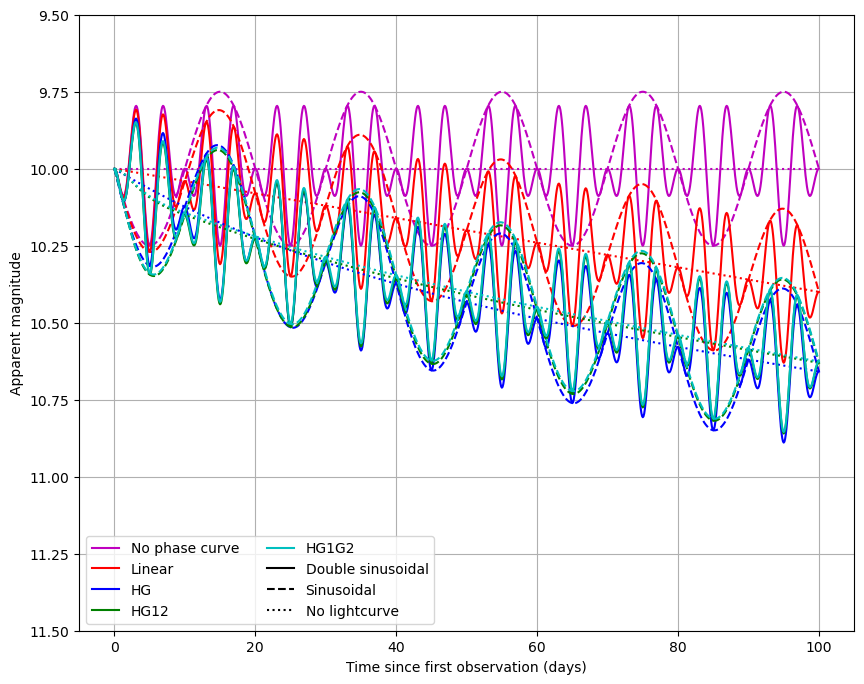

In [15]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["Simple_mag"],
    linestyle=":",
    label="__none__",
    color="m",
)
ax.plot(
    observations_df["fieldMJD_TAI"], observations_df["LCA_mag"], linestyle="--", label="__none__", color="m"
)
ax.plot(
    observations_df["fieldMJD_TAI"], observations_df["DLCA_mag"], linestyle="-", label="__none__", color="m"
)


ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["linear_mag"],
    linestyle=":",
    label="__none__",
    color="r",
)
ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["LCA_linear_mag"],
    linestyle="--",
    label="__none__",
    color="r",
)
ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["DLCA_linear_mag"],
    linestyle="-",
    label="__none__",
    color="r",
)


ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["HG_mag"],
    linestyle=":",
    label="__none__",
    color="b",
)
ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["LCA_HG_mag"],
    linestyle="--",
    label="__none__",
    color="b",
)
ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["DLCA_HG_mag"],
    linestyle="-",
    label="__none__",
    color="b",
)

ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["HG12_mag"],
    linestyle=":",
    label="__none__",
    color="g",
)
ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["LCA_HG12_mag"],
    linestyle="--",
    label="__none__",
    color="g",
)
ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["DLCA_HG12_mag"],
    linestyle="-",
    label="__none__",
    color="g",
)

ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["HG1G2_mag"],
    linestyle=":",
    label="__none__",
    color="c",
)
ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["LCA_HG1G2_mag"],
    linestyle="--",
    label="__none__",
    color="c",
)
ax.plot(
    observations_df["fieldMJD_TAI"],
    observations_df["DLCA_HG1G2_mag"],
    linestyle="-",
    label="__none__",
    color="c",
)


custom_legend = [
    Line2D([0], [0], color="m", linestyle="-"),
    Line2D([0], [0], color="r", linestyle="-"),
    Line2D([0], [0], color="b", linestyle="-"),
    Line2D([0], [0], color="g", linestyle="-"),
    Line2D([0], [0], color="c", linestyle="-"),
    Line2D([0], [0], color="k", linestyle="-"),
    Line2D([0], [0], color="k", linestyle="--"),
    Line2D([0], [0], color="k", linestyle=":"),
]

ax.legend(
    custom_legend,
    ["No phase curve", "Linear", "HG", "HG12", "HG1G2", "Double sinusoidal", "Sinusoidal", "No lightcurve"],
    ncol=2,
)
ax.set_xlabel("Time since first observation (days)")
ax.set_ylabel("Apparent magnitude")
ax.set_ylim(9.5, 11.5)
plt.gca().invert_yaxis()
plt.grid()
plt.show()